In [1]:
import pandas as pd

# Load the dataset from the CSV file
data = pd.read_csv("appointments.csv")

El conjunto de datos que has proporcionado parece estar relacionado con citas médicas de una compañía de seguros de salud. Aquí hay un resumen inicial de la estructura de los datos:

- **PatientId**: Identificador único para cada paciente (formato numérico grande).
- **AppointmentID**: Identificador único para cada cita.
- **Gender**: Género del paciente (F para femenino, M para masculino).
- **ScheduledDay**: Fecha y hora en que se programó la cita.
- **AppointmentDay**: Fecha de la cita.
- **Age**: Edad del paciente.
- **Neighbourhood**: Vecindario donde se atiende al paciente.
- **Scholarship**: Indica si el paciente está en un programa de ayuda social (0 = No, 1 = Sí).
- **Hipertension**: Indica si el paciente tiene hipertensión (0 = No, 1 = Sí).
- **Diabetes**: Indica si el paciente tiene diabetes (0 = No, 1 = Sí).
- **Alcoholism**: Indica si el paciente tiene problemas con el alcohol (0 = No, 1 = Sí).
- **Handcap**: Número que indica el nivel de discapacidad del paciente.
- **SMS_received**: Indica si el paciente recibió un SMS recordatorio de la cita (0 = No, 1 = Sí).
- **No-show**: Indica si el paciente no asistió a la cita (No = asistió, Yesnálisis en particular?

In [2]:
# Estadísticas descriptivas de las columnas numéricas
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [3]:
# Distribución de la variable 'No-show'
data['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

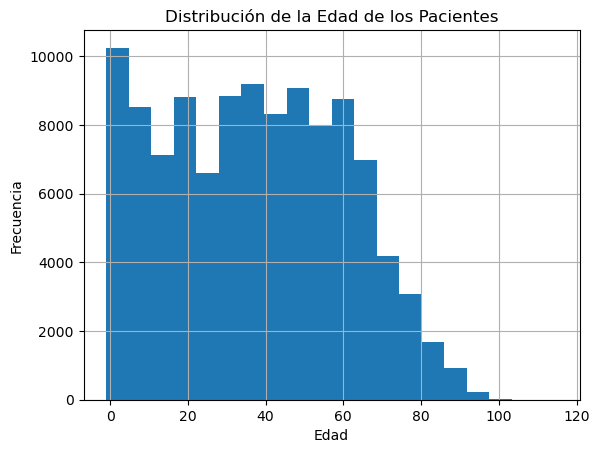

In [4]:
import matplotlib.pyplot as plt

# Histograma de las edades
data['Age'].hist(bins=20)
plt.title('Distribución de la Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
# Verificar valores faltantes en cada columna
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
# Convertir columnas de fecha a formato datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [7]:
# Verificar y eliminar filas duplicadas (si las hay)
duplicated_rows = data.duplicated().sum()
print("Filas duplicadas encontradas:", duplicated_rows)
data = data.drop_duplicates()

Filas duplicadas encontradas: 0


In [8]:
# Revisar valores inusuales en la columna 'Age'
print("Valores mínimos y máximos en la columna 'Age':", data['Age'].min(), data['Age'].max())

Valores mínimos y máximos en la columna 'Age': -1 115


In [9]:
# Eliminar registros con edades inusuales (por ejemplo, menores de 0 años)
data = data[data['Age'] >= 0]

In [10]:
# Verificar que ScheduledDay sea anterior o igual a AppointmentDay
data = data[data['ScheduledDay'] <= data['AppointmentDay']]

In [11]:
# Imprimir la forma final del dataset
print("Forma final del dataset después de la limpieza:", data.shape);

Forma final del dataset después de la limpieza: (71959, 14)


### **Descripción del Código:
1. **Valores Nulos:** Se verifica la cantidad de valores nulos en cada columna. Dependiendo del resultado, podrías decidir si imputar o eliminar esos valores (aunque este código no incluye la imputación).
  
2. **Formato de Fechas:** Se convierten las columnas `ScheduledDay` y `AppointmentDay` al formato `datetime`, lo que permitirá realizar cálculos de tiempo de manera más sencilla.

3. **Filas Duplicadas:** Se verifican y eliminan filas duplicadas del dataset.

4. **Edades Inusuales:** Se verifica si hay valores inusuales en la columna `Age` y se eliminan registros con edades menores de 0, que serían claramente incorrectos.

5. **Validación de Fechas:** Se asegura que la fecha de programación de la cita (`ScheduledDay`) sea anterior o igual a la fecha de la cita (`AppointmentDay`). Si no es así, esos registros se eliminan.
. Si no es así, esos registros se eliminan.terísticas y el análisis exploratorio adicional.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Identificación de outliers utilizando boxplots
def plot_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Detección de Outliers - {column}')
        plt.show()

In [14]:
# Identificar las columnas numéricas
numerical_columns = ['Age']  # Puedes agregar más columnas numéricas si las hay

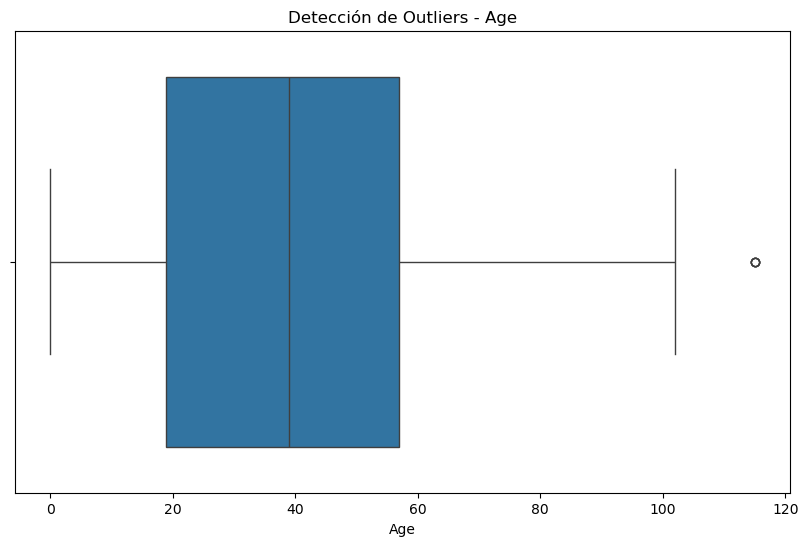

In [15]:
# Visualizar los outliers en las columnas numéricas
plot_outliers(data, numerical_columns)

In [16]:
# Remover outliers usando el método IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [17]:
# Remover outliers de las columnas numéricas
data_cleaned = remove_outliers(data, numerical_columns)

In [18]:
# Imprimir la forma del dataset después de remover outliers
print("Forma del dataset después de remover outliers:", data_cleaned.shape)

Forma del dataset después de remover outliers: (71955, 14)


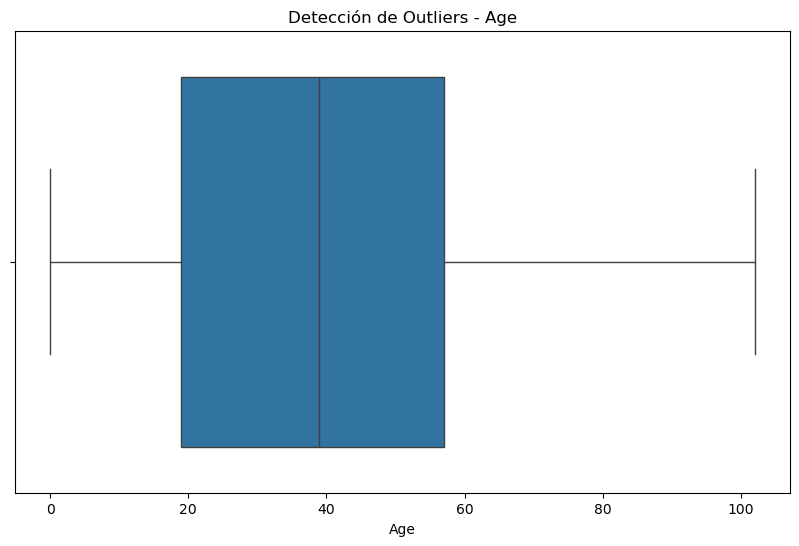

In [19]:
# Visualizar los outliers en las columnas numéricas
plot_outliers(data_cleaned, numerical_columns)

In [20]:
data = data_cleaned

In [21]:
# 1. Intervalo de tiempo entre la programación y la cita (días)
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

In [22]:
# 2. Día de la semana de la cita
data['AppointmentWeekday'] = data['AppointmentDay'].dt.day_name()

In [23]:
# 3. Hora del día en que se programó la cita (Hora del ScheduledDay)
data['ScheduledHour'] = data['ScheduledDay'].dt.hour

In [24]:
# Columnas que pueden ser eliminadas
columns_to_drop = ['PatientId', 'AppointmentID']

In [25]:
# Eliminar las columnas no necesarias
data_cleaned = data.drop(columns=columns_to_drop)

In [26]:
# Visualizar las primeras filas del dataset limpio
data_cleaned.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween,AppointmentWeekday,ScheduledHour
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1,Friday,8
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,Friday,15
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,Friday,15
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1,Friday,12
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1,Friday,14


In [27]:
# 4. Periodo del día en que se programó la cita (Mañana, Tarde, Noche)
def get_period_of_day(hour):
    if 5 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

data_cleaned['ScheduledPeriod'] = data_cleaned['ScheduledHour'].apply(get_period_of_day)

# Visualizar las primeras filas del dataset con las nuevas características
data_cleaned[['ScheduledDay', 'AppointmentDay', 'DaysBetween', 'AppointmentWeekday', 'ScheduledHour', 'ScheduledPeriod']].head()

,ScheduledDay,AppointmentDay,DaysBetween,AppointmentWeekday,ScheduledHour,ScheduledPeriod
5,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,1,Friday,8,Mañana
6,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,1,Friday,15,Tarde
7,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,1,Friday,15,Tarde
9,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,1,Friday,12,Tarde
10,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,1,Friday,14,Tarde


In [28]:
data_cleaned.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween,AppointmentWeekday,ScheduledHour,ScheduledPeriod
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1,Friday,8,Mañana
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,Friday,15,Tarde
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,Friday,15,Tarde
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1,Friday,12,Tarde
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1,Friday,14,Tarde


In [30]:
# Definir los rangos de edad y las etiquetas
bins = [0, 12, 19, 39, 59, 79, 150]  # 150 para cubrir edades mayores a 115
labels = ['Niñez (0-12)', 'Adolescencia (13-19)', 'Jóvenes adultos (20-39)', 
          'Adultos medios (40-59)', 'Adultos mayores (60-79)', 'Ancianos (80+)']

# Crear una nueva columna 'Age_group' con los rangos
data_cleaned['Age_group'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)

# Ver las frecuencias de cada grupo de edad
age_group_frequencies = data_cleaned['Age_group'].value_counts()

# Eliminar la columna 'Age'
data_cleaned.drop(columns=['Age'], inplace=True)

# Mostrar frecuencias de los grupos de edad
print(age_group_frequencies)


Age_group
Adultos medios (40-59)     20261
Jóvenes adultos (20-39)    18731
Adultos mayores (60-79)    13409
Niñez (0-12)               11658
Adolescencia (13-19)        5377
Ancianos (80+)              2519
Name: count, dtype: int64


In [32]:
# Transformar variables categóricas en dummies
data_dummies = pd.get_dummies(data_cleaned, columns=['Gender', 'Neighbourhood', 'No-show', 'Age_group','AppointmentWeekday'], drop_first=True)

# Mostrar las primeras filas del dataset transformado
data_dummies.head()


,ScheduledDay,AppointmentDay,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysBetween,ScheduledHour,...,Age_group_Adolescencia (13-19),Age_group_Jóvenes adultos (20-39),Age_group_Adultos medios (40-59),Age_group_Adultos mayores (60-79),Age_group_Ancianos (80+),AppointmentWeekday_Monday,AppointmentWeekday_Saturday,AppointmentWeekday_Thursday,AppointmentWeekday_Tuesday,AppointmentWeekday_Wednesday
5,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,0,1,0,0,0,0,1,8,...,False,False,False,True,False,False,False,False,False,False
6,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,0,1,15,...,False,True,False,False,False,False,False,False,False,False
7,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,0,1,15,...,False,False,True,False,False,False,False,False,False,False
9,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,0,1,12,...,False,True,False,False,False,False,False,False,False,False
10,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,0,1,14,...,False,True,False,False,False,False,False,False,False,False


In [38]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71955 entries, 5 to 110526
Columns: 102 entries, ScheduledDay to AppointmentWeekday_Wednesday
dtypes: bool(91), datetime64[ns, UTC](2), int32(1), int64(7), object(1)
memory usage: 12.6+ MB


In [37]:
data_dummies.shape

(71955, 102)